<a href="https://colab.research.google.com/github/mdsexton/capstone/blob/main/scratch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '16px'
      break
    }
  }
  '''))

get_ipython().events.register('pre_run_cell', increase_font)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

<IPython.core.display.Javascript object>

Mounted at /content/drive


Zipped files by navigating to desired directory in terminal then executing `zip -r test.zip . -x ".*" -x "__MACOSX"` \
Then uploading to google drive

In [3]:
!unzip '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train.zip' -d '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train'

<IPython.core.display.Javascript object>

Archive:  /content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train.zip
replace /content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train/id_7752_label_17.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: None



In [4]:
!unzip '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test.zip' -d '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test'

<IPython.core.display.Javascript object>

Archive:  /content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test.zip
replace /content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test/id_1575_label_4.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


<IPython.core.display.Javascript object>

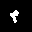

In [5]:
from IPython.display import Image
Image('/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test/id_1000_label_24.png')

In [6]:
class_dict = {'01' : ('alef', 'أ'),
              '02' : ('beh', 'ب'),
              '03' : ('teh', 'ت'),
              '04' : ('theh', 'ث'),
              '05' : ('jeem', 'ج'),
              '06' : ('7ah', 'ح'),
              '07' : ('khah', 'خ'),
              '08' : ('dal', 'د'),
              '09' : ('thal', 'ذ'),
              '10': ('reh', 'ر'),
              '11': ('zain', 'ز'),
              '12': ('seen', 'س'),
              '13': ('sheen', 'ش'),
              '14': ('sad', 'ص'),
              '15': ('dad', 'ض'),
              '16': ('6ah', 'ط'),
              '17': ('zah', 'ظ'),
              '18': ('ain', 'ع'),
              '19': ('ghain', 'غ'),
              '20': ('feh', 'ف'),
              '21': ('qaf', 'ق'),
              '22': ('kaf', 'ك'),
              '23': ('lam', 'ل'),
              '24': ('meem', 'م'),
              '25': ('noon', 'ن'),
              '26': ('heh', 'ﻫ'),
              '27': ('waw', 'و'),
              '28': ('yeh', 'ي')}

<IPython.core.display.Javascript object>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
 

np.random.seed(42)
np.set_printoptions(threshold=np.inf)

<IPython.core.display.Javascript object>

In [8]:
X_train = []
y_train = []

train_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train/'

for file in os.listdir(train_path):
    try:
        char = load_img(train_path + file, target_size=(32, 32), color_mode='grayscale')
        char_arr = img_to_array(char) / 31
        X_train.append(char_arr)
        y_train.append(file[-6:-4].replace('_', '0')) #is there a better/more elegant way to do this?

    except:
        print(f'Error for file: {file}')

print(f'{len(X_train)} pictures converted')

<IPython.core.display.Javascript object>

13440 pictures converted


In [9]:
X_test = []
y_test = []

test_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test/'

for file in os.listdir(test_path):
    try:
        char = load_img(test_path + file, target_size=(32, 32), color_mode='grayscale')
        char_arr = img_to_array(char) / 31
        X_test.append(char_arr)
        y_test.append(file[-6:-4].replace('_', '0')) #is there a better/more elegant way to do this?
    except:
        print(f'Error for file: {file}')

print(f'{len(X_test)} pictures converted')

<IPython.core.display.Javascript object>

3360 pictures converted


<IPython.core.display.Javascript object>

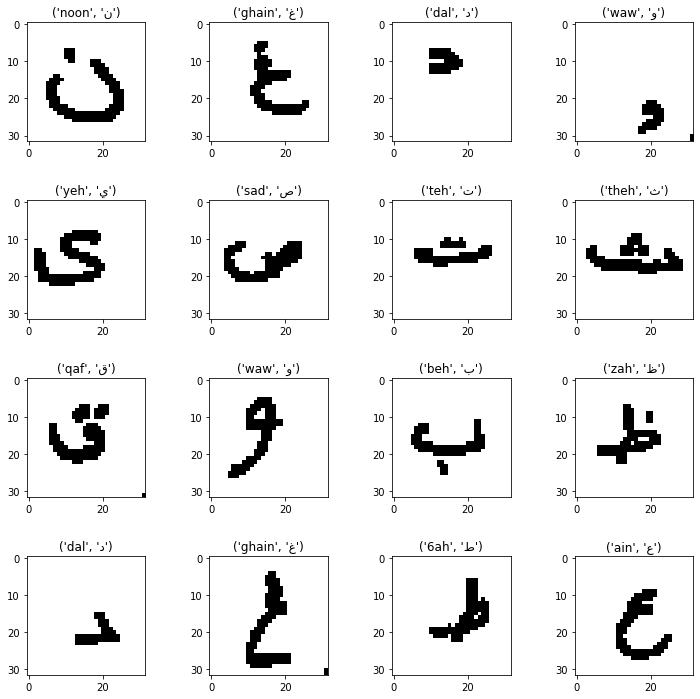

In [10]:
fig = plt.figure(figsize=(12, 12))
for i in range(1,17):
    fig.add_subplot(4,4,i)
    plt.title(label=class_dict[y_test[i]])
    plt.imshow(np.squeeze(X_test[i]), cmap='Greys')
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
plt.show()

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<IPython.core.display.Javascript object>

cell below is from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [12]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

<IPython.core.display.Javascript object>

## Baseline Model CNN

In [13]:
# construct network
baseline = Sequential()

# feature learning - first layer
baseline.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 1)))
baseline.add(MaxPooling2D((2, 2)))

# classification
baseline.add(Flatten())
baseline.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
baseline.add(Dense(29, activation='softmax'))

# compile baseline
opt = SGD(learning_rate=0.01, momentum=0.9)
baseline.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# classification accuracy metric is appropriates since we have the same number
# (480) of samples in each of the 28 classes (not counting 0 which has 0)

<IPython.core.display.Javascript object>

In [14]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

<IPython.core.display.Javascript object>

In [15]:
history = baseline.fit(X_train_array, y_train, validation_data=(X_test_array, y_test), batch_size=32, epochs=5)

<IPython.core.display.Javascript object>

Epoch 1/5
420/420 [==============================] - 17s 4ms/step - loss: 2.1625 - accuracy: 0.3966 - val_loss: 1.2592 - val_accuracy: 0.6018
Epoch 2/5
420/420 [==============================] - 1s 3ms/step - loss: 0.9990 - accuracy: 0.6781 - val_loss: 1.0006 - val_accuracy: 0.6720
Epoch 3/5
420/420 [==============================] - 1s 3ms/step - loss: 0.6746 - accuracy: 0.7749 - val_loss: 1.0537 - val_accuracy: 0.6765
Epoch 4/5
420/420 [==============================] - 1s 3ms/step - loss: 0.5028 - accuracy: 0.8287 - val_loss: 1.0285 - val_accuracy: 0.7205
Epoch 5/5
420/420 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8653 - val_loss: 1.1677 - val_accuracy: 0.6914


## Model 1

In [16]:
history1 = baseline.fit(X_train_array, y_train, validation_data=(X_test_array, y_test), batch_size=256, epochs=50)

<IPython.core.display.Javascript object>

Epoch 1/50
53/53 [==============================] - 1s 11ms/step - loss: 0.1854 - accuracy: 0.9423 - val_loss: 0.9913 - val_accuracy: 0.7604
Epoch 2/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0904 - accuracy: 0.9777 - val_loss: 1.0105 - val_accuracy: 0.7693
Epoch 3/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0653 - accuracy: 0.9873 - val_loss: 1.0545 - val_accuracy: 0.7711
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9914 - val_loss: 1.0708 - val_accuracy: 0.7741
Epoch 5/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0420 - accuracy: 0.9941 - val_loss: 1.0998 - val_accuracy: 0.7759
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0352 - accuracy: 0.9963 - val_loss: 1.1258 - val_accuracy: 0.7738
Epoch 7/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.9972 - val_loss: 1.1450 - val_accuracy: 0.7735
Epoch 8/50
53/53 [=